In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tikzplotlib
# plt.style.use(['science','bright'])
# plt.style.use(['fivethirtyeight'])
# plt.style.use(['seaborn-paper'])
# plt.style.use(['ggplot'])
plt.style.use(['default'])
plt.rcParams['text.usetex'] = True
# plt.rcParams['font.size'] = 15
plt.rcParams["font.family"] = "Times New Roman"

from os import path
import pickle
import itertools
from functools import partial
import pprint
pp = pprint.PrettyPrinter(indent=4)

from util import get_loader

In [2]:
loader = get_loader()

'''NOTES:
exp = loader.find_by_id(2)
len(qs)
qs[0].to_dict()
exp.metrics.keys()
loader.find_latest().to_dict()
'''

'NOTES:\nexp = loader.find_by_id(2)\nlen(qs)\nqs[0].to_dict()\nexp.metrics.keys()\nloader.find_latest().to_dict()\n'

In [3]:
pd.set_option('display.max_columns', 500)  # or 1000
pd.set_option('display.max_rows', 500)  # or 1000

In [50]:
dataset_names = {'phishing-websites':'phishing',
                 'speed-dating':'speed',
                 'bank-marketing':'bank',
                }

# Plot

In [51]:
# loader.find_latest().to_dict()
version = 9

query = {"$and": [
    {"status": 'COMPLETED'},
    {"config.ver": version},
#     {"_id": 9},
#     {"config.dup_times": 1},
#     {"config.dataset": "iris"}
        ]}
qs = loader.find(query)
df = qs.project(on=[
    'config.ver',
    'config.iter',
    'config.dataset',
    'config.costtype',
    'config.rn',
    'config.prefix',
    'config.criterion',
    'config.tradeoff',
    
    'info.n',
    'info.nvar',
    'info.ncls',
    'info.auc',
    'info.cost',
    'info.runtime',
    ])

df['name'] = df['prefix']+df['criterion']
df['dataset'].replace(dataset_names, inplace=True)
df = df.drop(columns=['prefix', 'criterion'])
df = df.sort_values(by=['rn','dataset','costtype','name','tradeoff'])
df.groupby(['rn','dataset','name'])['ver'].count()

rn    dataset      name     
42    bank         epentropy    7
                   epgini       7
      bioresponse  epentropy    7
                   epgini       7
      breast-w     epentropy    7
                   epgini       7
      covertype    epentropy    7
                   epgini       7
      default      epentropy    7
                   epgini       7
      diabetic     epentropy    7
                   epgini       7
      dota2        epentropy    7
                   epgini       7
      electricity  epentropy    7
                   epgini       7
      firewall     epentropy    7
                   epgini       7
      ilpd         epentropy    7
                   epgini       7
      iris         epentropy    7
                   epgini       7
      letter       epentropy    7
                   epgini       7
      musk         epentropy    7
                   epgini       7
      obesity      epentropy    7
                   epgini       7
      phishing     

In [56]:
crit = 'epentropy'
# crit = 'epgini'

df2 = df.pivot_table(index=['name','dataset','rn'], columns='tradeoff', values=['auc','cost'])
df2.columns = pd.MultiIndex.from_product([['ROC AUC','Cost'],[0.01,0.1,1,10,100,1000,10000]])
df2 = df2.groupby(['name','dataset']).mean()
df2 = df2.loc[crit].transpose()
df2

dataset                bank  bioresponse  breast-w  covertype    default  \
ROC AUC 0.01       0.833427     0.744010  0.944369   0.848476   0.634105   
        0.10       0.833434     0.755848  0.944369   0.851282   0.634105   
        1.00       0.833416     0.769892  0.936481   0.851550   0.633965   
        10.00      0.841792     0.757760  0.946784   0.916427   0.684093   
        100.00     0.872218     0.777169  0.924064   0.922599   0.718316   
        1000.00    0.898136     0.747854  0.939764   0.938173   0.714834   
        10000.00   0.901597     0.756240  0.939764   0.944581   0.706766   
Cost    0.01       8.106856     7.878095  4.267894   8.268830   8.546270   
        0.10       8.106856     7.877841  4.267894   8.294623   8.546270   
        1.00       8.106856     7.872127  4.355147   8.294640   8.546683   
        10.00      8.041047     7.770032  4.007498   9.248170   9.068413   
        100.00     8.238422     7.797841  3.662577   9.346686  10.009587   
        1000.00    9.147207     9.527111  3.678255  10.467710  11.328381   
        10000.00  11.438820    11.364444  3.680982  11.928024  15.268921   

dataset            diabetic      dota2  electricity  firewall      ilpd  \
ROC AUC 0.01       0.565526   0.535046     0.805467  0.948227  0.499173   
        0.10       0.565526   0.535046     0.805467  0.951057  0.499173   
        1.00       0.565526   0.535046     0.806124  0.953621  0.504784   
        10.00      0.566988   0.535113     0.807082  0.953621  0.497047   
        100.00     0.613813   0.535387     0.808268  0.949011  0.512462   
        1000.00    0.633878   0.539389     0.815005  0.946123  0.515946   
        10000.00   0.635905   0.559070     0.816076  0.946123  0.522502   
Cost    0.01       8.173833   9.142392     8.410495  3.348826  6.550369   
        0.10       8.173833   9.142392     8.410495  3.215176  6.550369   
        1.00       8.173833   9.142392     8.399229  2.701860  6.564292   
        10.00      8.168480   9.142392     8.369623  2.705260  6.406224   
        100.00     8.636897   9.137416     8.801873  3.313154  6.397215   
        1000.00    9.806397  10.230985     9.583084  3.359857  6.843571   
        10000.00  11.824843  18.168620    10.111980  3.359813  7.040131   

dataset               iris    letter      musk   obesity  phishing   phoneme  \
ROC AUC 0.01      0.935556  0.881518  0.909827  0.899699  0.950240  0.807210   
        0.10      0.935556  0.882897  0.910000  0.899560  0.950133  0.807210   
        1.00      0.940000  0.913143  0.914355  0.930075  0.972743  0.809549   
        10.00     0.933333  0.938317  0.935141  0.935893  0.974390  0.814535   
        100.00    0.933333  0.956689  0.930777  0.945246  0.983502  0.799084   
        1000.00   0.933333  0.959675  0.964838  0.934408  0.985851  0.799991   
        10000.00  0.933333  0.959675  0.965985  0.935982  0.985463  0.799674   
Cost    0.01      4.079365  8.237381  7.323661  7.571880  7.144439  6.474176   
        0.10      4.079365  8.240833  7.304533  7.578425  7.143577  6.474176   
        1.00      2.603175  8.221833  7.095063  7.434665  6.098346  6.502380   
        10.00     2.415873  8.367548  6.628771  7.446626  6.114974  6.312621   
        100.00    2.409524  8.722833  6.758553  7.466035  6.229991  6.551824   
        1000.00   2.409524  9.308405  6.841851  7.771383  6.211640  6.956196   
        10000.00  2.409524  9.745833  7.043164  8.018957  6.452744  7.198220   

dataset            shoppers   spambase     speed  tic-tac-toe  
ROC AUC 0.01       0.717239   0.881200  0.654401     0.877612  
        0.10       0.717239   0.874553  0.646200     0.875124  
        1.00       0.716231   0.875574  0.668101     0.901473  
        10.00      0.839303   0.884075  0.719369     0.942229  
        100.00     0.863481   0.925840  0.770687     0.958746  
        1000.00    0.851639   0.920092  0.746924     0.942965  
        10000.00   0.795857   0.918809  0.731608     0.927960  
Cost    0.01       8

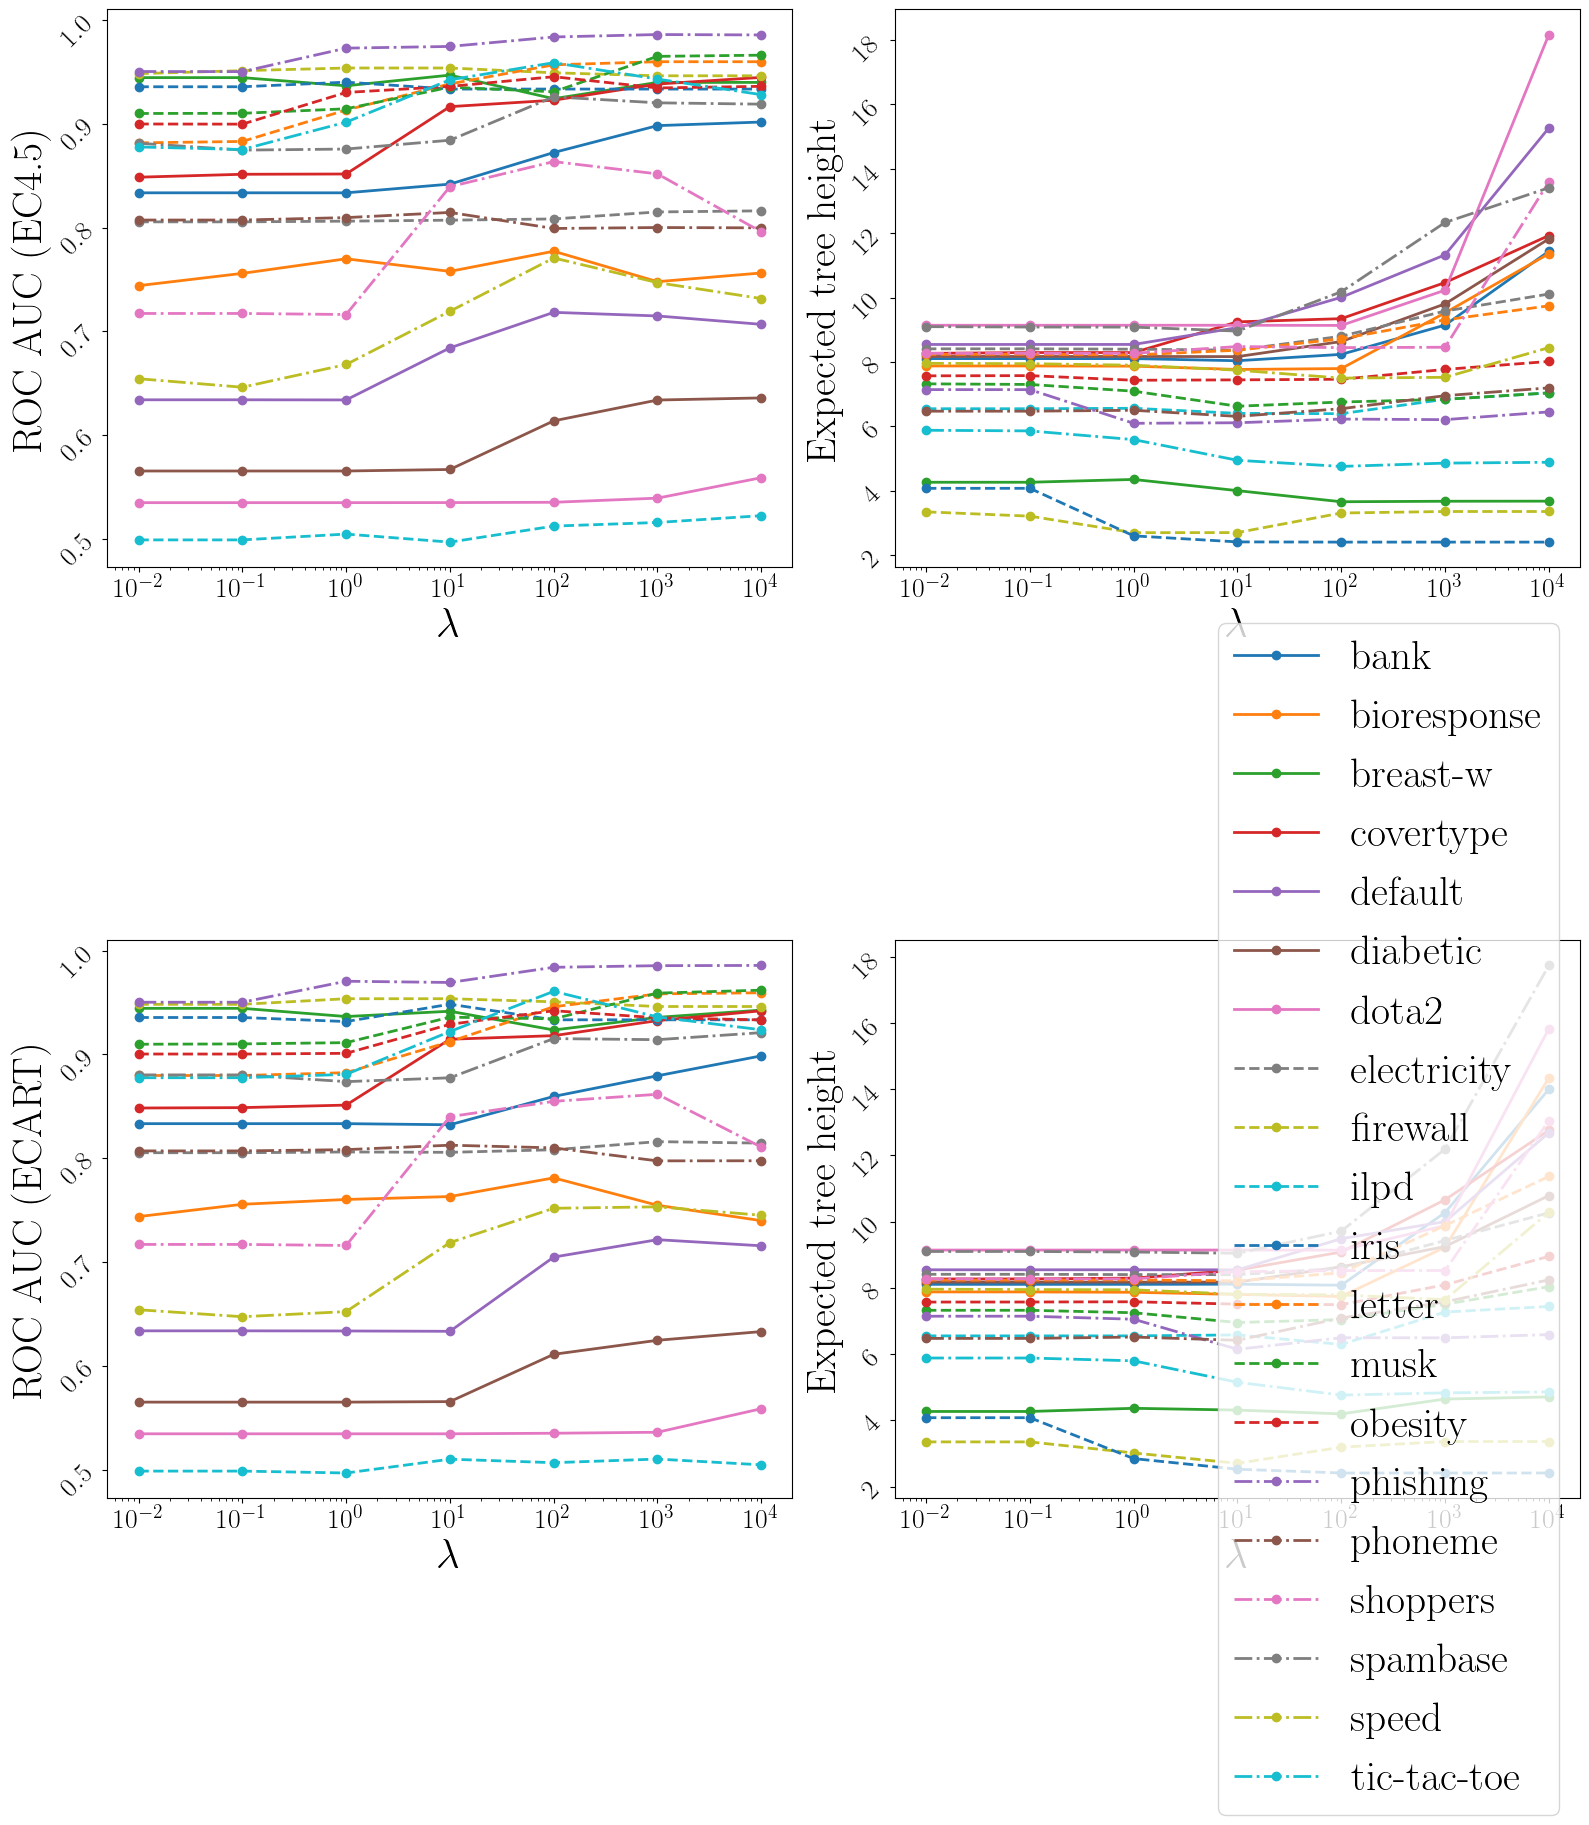

In [93]:
datasets = df2.columns
fig, ax_lst = plt.subplots(2, 2, figsize=(16, 18))
ax_lst = ax_lst.flatten()
sz_font = 30
lnstys = ['-', '--', '-.']

def drawauc(ax, df2, name):
    metric = 'ROC AUC'
    mingap = 0.02
    ax.set_xscale('log')
    ax.tick_params(axis='x', labelsize=sz_font-10)
    ax.tick_params(axis='y', labelsize=sz_font-10, labelrotation=45)
    ax.set_ylabel(f'{metric} ({name})', fontsize=sz_font)
    ax.set_xticks([0.01,0.1,1,10,100,1000,10000])
    ax.set_xlabel('$\lambda$', fontsize=sz_font)
    for i,dataset in enumerate(datasets):
        lnsty = i//7
        ax.plot(df2.loc[metric,dataset].index.to_numpy(),
                df2.loc[metric,dataset].to_numpy(),
                linestyle=lnstys[lnsty],
                marker='o', lw=2, label=dataset)
    
    
def drawcost(ax, df2, name):
    metric = 'Cost'
    mingap = 1
    ax.set_xscale('log')
    ax.tick_params(axis='x', labelsize=sz_font-10)
    ax.tick_params(axis='y', labelsize=sz_font-10, labelrotation=45)
    ax.set_xticks([0.01,0.1,1,10,100,1000,10000])
    ax.set_xlabel('$\lambda$', fontsize=sz_font)
    ax.set_ylabel('Expected tree height', fontsize=sz_font)
    for i,dataset in enumerate(datasets):
        lnsty = i//7
        ax.plot(df2.loc[metric,dataset].index.to_numpy(),
                df2.loc[metric,dataset].to_numpy(),
                linestyle=lnstys[lnsty],
                marker='o', lw=2, label=dataset)
    

crit = 'epentropy'
df2 = df.pivot_table(index=['name','dataset','rn'], columns='tradeoff', values=['auc','cost'])
df2.columns = pd.MultiIndex.from_product([['ROC AUC','Cost'],[0.01,0.1,1,10,100,1000,10000]])
df2 = df2.groupby(['name','dataset']).mean()
df2 = df2.loc[crit].transpose()
drawauc(ax_lst[0], df2, 'EC4.5')
drawcost(ax_lst[1], df2, 'EC4.5')

crit = 'epgini'
df2 = df.pivot_table(index=['name','dataset','rn'], columns='tradeoff', values=['auc','cost'])
df2.columns = pd.MultiIndex.from_product([['ROC AUC','Cost'],[0.01,0.1,1,10,100,1000,10000]])
df2 = df2.groupby(['name','dataset']).mean()
df2 = df2.loc[crit].transpose()
drawauc(ax_lst[2], df2, 'ECART')
drawcost(ax_lst[3], df2, 'ECART')    
        
    
# handles, labels = ax_lst[3].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center right')
    
# Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
plt.legend(loc='center right', bbox_to_anchor=(1, 0.5),prop={'size': sz_font})

fig.tight_layout()
# fig.savefig('tradeoff-{}.pdf'.format('ECART' if crit=='epgini' else 'EC45'))
# tikzplotlib.save('tradeoff-{}.tex'.format('ECART' if crit=='epgini' else 'EC45'))
code = tikzplotlib.get_tikz_code()

In [94]:
code_ = code

In [95]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

def add_opt(code, key, opt, beg=False):
    idx = code.find(key)
    if beg:
        return code[:idx] + opt + code[idx:]
    return code[:idx+len(key)] + opt + code[idx+len(key):]

def add_opt_which(code, which, key, opt, beg=False):
    idx = find_nth(code, key, which)
    if beg:
        return code[:idx] + opt + code[idx:]
    return code[:idx+len(key)] + opt + code[idx+len(key):]


code = code_

key_gl = '\\begin{groupplot}['
key_per = 'nextgroupplot['

# code = code.replace('\nyticklabel style={rotate=45.0}', '')
code = code.replace('mark size=3', 'mark size=1')
code = code.replace('\nyticklabel style={rotate=45.0},', '')
code = code.replace('at={(1,0.5)},', 'at={(2.1,1)},')
code = code.replace('addplot [thick', 'addplot [semithick')
code = code.replace('legend style={', 'legend style={font=\small,')

opt = '''
width = 0.35\\textwidth, height = 0.4\\textwidth,
tickwidth=1pt,
tick label style={font=\\tiny},
label style={font=\\small},
group/horizontal sep=35pt,
every axis y label/.style={ at={(ticklabel cs:0.5)},rotate=90,anchor=near ticklabel,},
'''
code = add_opt(code, key_gl, opt)
    
# print(code)
# with open('figs/tradeoff-{}.tex'.format('ECART' if crit=='epgini' else 'EC45'), 'w') as fout:
with open('figs/tradeoff.tex', 'w') as fout:
    fout.write(code)